# Import Libraries [Step 1]

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Check version of matplot
mpl.__version__

'3.7.2'

In [3]:
# Enable visualizations through matplot
%matplotlib inline

# Import Dataset & Clean It [Step 2]

In [4]:
# Creating a path
path = r'C:\Users\mduong\Documents\Python Scripts'

In [5]:
# Import crime data CSV file
df_crime = pd.read_csv(os.path.join(path, 'denver2_crimedata_2018-2023_cleaned.csv'), low_memory=False, index_col = False)

In [6]:
# Show how many rows and columns are in the crime data dataframe(df)
df_crime.shape

(377793, 27)

In [7]:
# Show detailed information about the crime data df
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377793 entries, 0 to 377792
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Unnamed: 0               377793 non-null  int64  
 1   incident_id              377793 non-null  float64
 2   offense_id               377793 non-null  float64
 3   offense_code             377793 non-null  int64  
 4   offense_code_extension   377793 non-null  int64  
 5   crime                    377793 non-null  object 
 6   crime_category           377793 non-null  object 
 7   crime_startdate          377793 non-null  object 
 8   crime_yr                 377793 non-null  int64  
 9   day_of_week_first        377793 non-null  object 
 10  crime_enddate            206825 non-null  object 
 11  day_btwn_first_last      206825 non-null  float64
 12  reported_date            377793 non-null  object 
 13  day_btwn_first_reported  377793 non-null  float64
 14  repo

In [8]:
# Show the first five rows in the crime data df
df_crime.head()

,Unnamed: 0,incident_id,offense_id,offense_code,offense_code_extension,crime,crime_category,crime_startdate,crime_yr,day_of_week_first,...,geo_y,geo_lon,geo_lat,district_id,precinct_id,neighborhood_id,county,is_crime,is_traffic,victim_count
0,0,2.023601e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/29/2018 17:00,2018,Fri,...,1736251.0,-104.674045,39.851926,7,759,DIA,Denver,1,0,1
1,1,2.023135e+09,2.020000e+15,1102,1,sex-aslt-rape-pot,sexual-assault,3/15/2018 12:45,2018,Thu,...,NaN,NaN,NaN,1,122,Villa Park,Denver,1,0,1
2,2,2.022602e+10,2.020000e+16,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2018 16:20,2018,Fri,...,1715591.0,-104.895448,39.796554,5,511,Central Park,Denver,1,0,1
3,3,2.023191e+09,2.020000e+15,1109,0,sex-aslt-non-rape,sexual-assault,1/1/2019 8:00,2019,Tue,...,NaN,NaN,NaN,2,221,Northeast Park Hill,Denver,1,0,1
4,4,2.023387e+09,2.020000e+15,2399,0,theft-other,larceny,6/1/2019 12:00,2019,Sat,...,1683676.0,-105.035631,39.709575,4,412,Westwood,Denver,1,0,1


In [9]:
# Remove unnecessary columns
df_crime = df_crime.drop(columns = ['Unnamed: 0', 'offense_id', 'offense_code', 'offense_code_extension'])

In [10]:
# Check columns
df_crime.columns

Index(['incident_id', 'crime', 'crime_category', 'crime_startdate', 'crime_yr',
       'day_of_week_first', 'crime_enddate', 'day_btwn_first_last',
       'reported_date', 'day_btwn_first_reported', 'reported_yr',
       'incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat',
       'district_id', 'precinct_id', 'neighborhood_id', 'county', 'is_crime',
       'is_traffic', 'victim_count'],
      dtype='object')

In [11]:
# Check for mixed-type data in df_crime
for col in df_crime.columns.tolist():
  weird = (df_crime[[col]].applymap(type) != df_crime[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (df_crime[weird]) > 0:
    print (col, ' mixed')
  else: print(col, ' consistent')

incident_id  consistent
crime  consistent
crime_category  consistent
crime_startdate  consistent
crime_yr  consistent
day_of_week_first  consistent
crime_enddate  mixed
day_btwn_first_last  consistent
reported_date  consistent
day_btwn_first_reported  consistent
reported_yr  consistent
incident_address  mixed
geo_x  consistent
geo_y  consistent
geo_lon  consistent
geo_lat  consistent
district_id  mixed
precinct_id  consistent
neighborhood_id  mixed
county  consistent
is_crime  consistent
is_traffic  consistent
victim_count  consistent


In [12]:
# Check for missing values 
df_crime.isnull().sum()

incident_id                     0
crime                           0
crime_category                  0
crime_startdate                 0
crime_yr                        0
day_of_week_first               0
crime_enddate              170968
day_btwn_first_last        170968
reported_date                   0
day_btwn_first_reported         0
reported_yr                     0
incident_address            15177
geo_x                       15177
geo_y                       15177
geo_lon                     15452
geo_lat                     15452
district_id                    57
precinct_id                     0
neighborhood_id               684
county                          0
is_crime                        0
is_traffic                      0
victim_count                    0
dtype: int64

In [13]:
df_nonull = df_crime.dropna()

In [14]:
# Check for missing values
df_nonull.isnull().sum()

incident_id                0
crime                      0
crime_category             0
crime_startdate            0
crime_yr                   0
day_of_week_first          0
crime_enddate              0
day_btwn_first_last        0
reported_date              0
day_btwn_first_reported    0
reported_yr                0
incident_address           0
geo_x                      0
geo_y                      0
geo_lon                    0
geo_lat                    0
district_id                0
precinct_id                0
neighborhood_id            0
county                     0
is_crime                   0
is_traffic                 0
victim_count               0
dtype: int64

In [17]:
# Remove unnecessary columns; from the lesson: "...k-means algorithm can only handle numerical variables, 
# so you’ll need to remove any categorical columns from your data."
df_kmeans = df_nonull.drop(columns = ['incident_id', 'crime', 'crime_category', 'crime_startdate', 'crime_yr', 'crime_enddate',
                                     'reported_date', 'reported_yr', 'incident_address', 'geo_x', 'geo_y', 'geo_lon', 'geo_lat', 
                                     'district_id', 'precinct_id', 'neighborhood_id', 'county', 'is_crime', 'is_traffic',
                                     'day_of_week_first'])

In [18]:
df_kmeans.head()

,day_btwn_first_last,day_btwn_first_reported,victim_count
0,1838.83,1843.85,1
2,1543.00,1543.01,1
4,1508.96,1509.03,1
5,1505.00,1505.01,1
6,1489.52,1489.78,1


# Elbow Technique [Step 3]

In [19]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [20]:
score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

print(score)

C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mduong\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_

[-464252317.51819354, -192697390.90179184, -119693604.01746732, -82275249.28734322, -63981558.54156926, -51425677.696832426, -40187062.87080969, -31958337.612454142, -26397013.389381252]


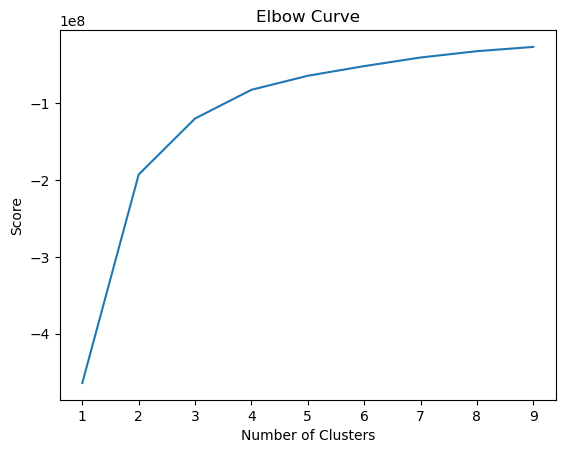

In [21]:
# Plot the elbow curve using PyLab.
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

# Informed Decision about Clusters [Step 4]
Make an informed decision about the number of clusters you’ll use in your k-means algorithm based on the chart. Explain why you chose that number in a markdown cell.

Based on the elbow curve above, I'll be using four (4) clusters. There were multiple "elbow" or points, but the one on four is the last one before it starts flattening out. 

# K-Means Algorithm [Step 5]

In [22]:
# Create the k-means object.
kmeans = KMeans(n_init=10,n_clusters = 4) 

In [23]:
# Fit the k-means object to the data.
kmeans.fit(df_kmeans)

KMeans(n_clusters=4, n_init=10)

# Adding Clusters to Dataframe [Step 6]

In [25]:
df_kmeans['clusters'] = kmeans.fit_predict(df_kmeans) #adding clusters column to a dataframe

In [26]:
df_kmeans.head()

,day_btwn_first_last,day_btwn_first_reported,victim_count,clusters
0,1838.83,1843.85,1,2
2,1543.00,1543.01,1,2
4,1508.96,1509.03,1,2
5,1505.00,1505.01,1,2
6,1489.52,1489.78,1,2


# Create Visualizations (Scatterplots) [Step 7]

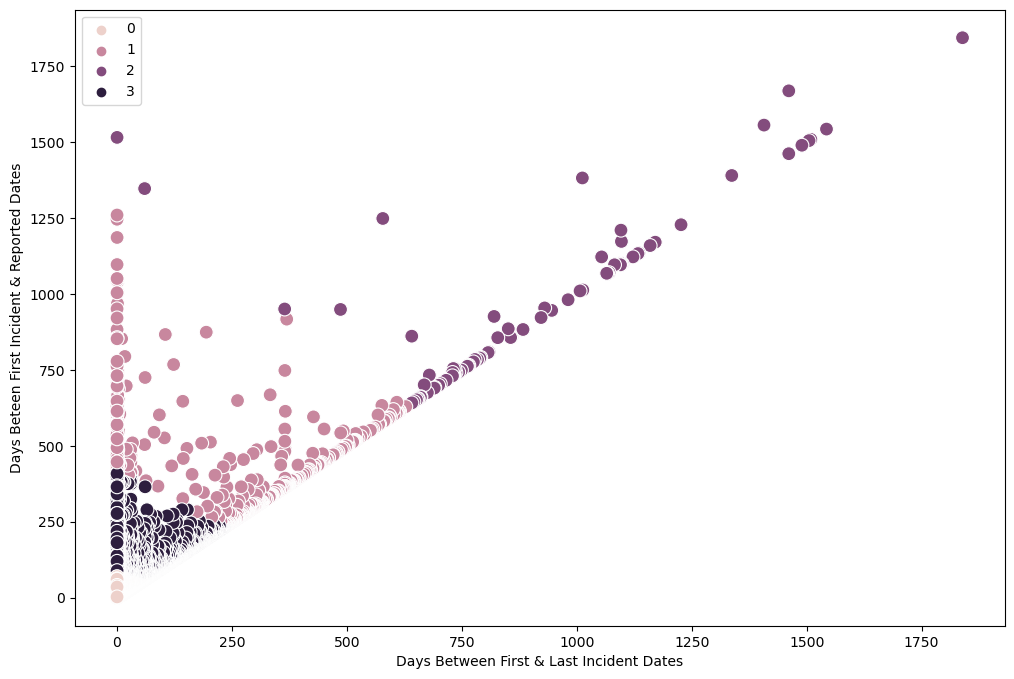

In [27]:
# Plot the clusters for the Days Between First & Last Incident Dates ('day_btwn_first_last') and Days Between First
# and Reported Dates ('day_btwn_first_reported') variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['day_btwn_first_last'], y=df_kmeans['day_btwn_first_reported'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Days Between First & Last Incident Dates') # Label x-axis.
plt.ylabel('Days Beteen First Incident & Reported Dates') # Label y-axis.
plt.show()

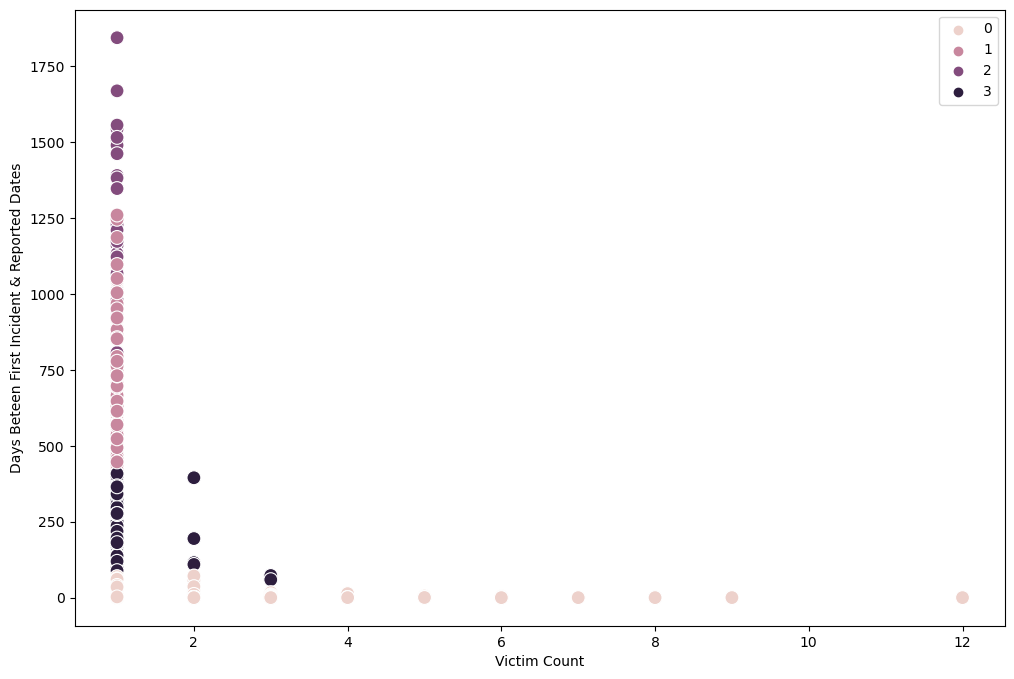

In [28]:
# Plot the clusters for the number of victims ('victim_count') and Days Between First and Reported Dates 
# ('day_btwn_first_reported') variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_kmeans['victim_count'], y=df_kmeans['day_btwn_first_reported'], hue=kmeans.labels_, s=100) 

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Victim Count') # Label x-axis.
plt.ylabel('Days Beteen First Incident & Reported Dates') # Label y-axis.
plt.show()

# Discussion About the Clusters [Step 8]

For the first scatterplot, there are large clusters at the left because there are more cases being reported soon after they are discovered. As more days passes by, so does the length of how long it takes for someone to actually report the crime occurring -- these extremities are more scattered out than the ones on the left. This makes sense as you'd expect most crimes to be discovered and reported quite promptly while there are some that would go for years either unnoticed or unreported. 

For the second scatterplot, most cases only have one (1) victim, so a lot of the clusters will be on the left, but their length between when the crime first occurred to when they reported is quite sporadic. As there are more victims, the faster it was for the crime to get reported, which makes sense. 

# Descriptive Analysis for the Clusters & Discussion [Step 9]

In [50]:
# Rename Clusters
df_kmeans.loc[df_kmeans['clusters'] == 3, 'clusters'] = 'dark purple'
df_kmeans.loc[df_kmeans['clusters'] == 2, 'clusters'] = 'purple'
df_kmeans.loc[df_kmeans['clusters'] == 1, 'clusters'] = 'pink'
df_kmeans.loc[df_kmeans['clusters'] == 0, 'clusters'] = 'beige'

In [51]:
df_kmeans.groupby('clusters').agg({'day_btwn_first_last':['mean', 'median'], 
                         'day_btwn_first_reported':['mean', 'median']}) 

day_btwn_first_last         day_btwn_first_reported         
                        mean  median                    mean   median
clusters                                                             
High               71.087855   65.00              127.241937  106.750
Low               296.790547  341.64              412.761431  366.450
Moderate          882.149216  776.73              942.669706  832.555
None                1.462937    0.31                3.014299    0.680

In [49]:
df_kmeans.loc[df_kmeans['clusters'] == 'dark purple', 'clusters'] = 'High'
df_kmeans.loc[df_kmeans['clusters'] == 'purple', 'clusters'] = 'Moderate'
df_kmeans.loc[df_kmeans['clusters'] == 'pink', 'clusters'] = 'Low'
df_kmeans.loc[df_kmeans['clusters'] == 'beige', 'clusters'] = 'None'

In [48]:
df_kmeans['clusters'].value_counts()

clusters
None        198552
High          2844
Low            622
Moderate       102
Name: count, dtype: int64

# Final Thoughts [Step 10]
Propose what these results could be useful for in future steps of an analytics pipeline.

I'd be interested in figuring out why there's such extremes with the days between the last incident date and the report date. This is either a data entry issue, or the community is not informed on how to notice when an incident occurred and about the benefits of a timely report. The other steps would be to work on some more descriptive analysis on the dataset to answer some more questions posed in the first task of this achievement, such as what the top crimes and neighborhoods are. 